In [13]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.io
from scipy.optimize import curve_fit


In [ ]:
path_to_folder = 'E:\\PC Config\\Documents\\Fac\\Cours\\Semestre 9 M2\\Projets\\Data\\Dev_WSe2_15_09_B\\Good_measurements\\'


VDS = [0.1,0.2,0.3,0.4,0.5]
IDS = np.zeros([51*2,5])
IDS_error = np.zeros([51*2,5])
VGS = np.zeros([51*2,5])
path = []
path.append('IVDev_WSe2_15_09_B_plus_VGS_Sweep_VDS_0d1V_18_9_2023-16-12-46')
path.append('IVDev_WSe2_15_09_B_minus_VGS_Sweep_VDS_0d1V_18_9_2023-16-10-49')
path.append('IVDev_WSe2_15_09_B_plus_VGS_Sweep_VDS_0d2V_18_9_2023-16-14-48')
path.append('IVDev_WSe2_15_09_B_minus_VGS_Sweep_VDS_0d2V_18_9_2023-16-16-17')
path.append( 'IVDev_WSe2_15_09_B_plus_VGS_Sweep_VDS_0d3V_18_9_2023-16-25-16')
path.append('IVDev_WSe2_15_09_B_minus_VGS_Sweep_VDS_0d3V_18_9_2023-16-22-6')
path.append('IVDev_WSe2_15_09_B_plus_VGS_Sweep_VDS_0d4V_18_9_2023-16-27-6')
path.append('IVDev_WSe2_15_09_B_minus_VGS_Sweep_VDS_0d4V_18_9_2023-16-29-1')
path.append('IVDev_WSe2_15_09_B_plus_VGS_Sweep_VDS_0d5V_18_9_2023-16-32-31')
path.append('IVDev_WSe2_15_09_B_minus_VGS_Sweep_VDS_0d5V_18_9_2023-16-30-45')

for i in range(5):
    file_minus = path_to_folder + path[2*i] + '.mat'
    mat = scipy.io.loadmat(file_minus)
    IDS[:51,i] = mat['IDS current'][0]
    IDS_error[:51,i] = mat['IDS_error'][0]
    VGS[:51,i] = mat['VGS'][0]
    file_plus = path_to_folder + path[2*i+1] + '.mat'
    mat = scipy.io.loadmat(file_plus)
    IDS[51:,i] = mat['IDS current'][0]
    VGS[51:,i] = mat['VGS'][0]
    print(VGS[51:,i])
    IDS_error[51:,i] = mat['IDS_error'][0]

plt.figure()
for i in range(5):
    plt.errorbar(VGS[:,i],IDS[:,i],IDS_error[:,i], label=f'VDS = {VDS[i]}')
plt.xlabel('VGS (in V)')
plt.ylabel('IDS (in A)')
plt.legend()
plt.show()




In [2]:
path_to_folder = 'E:\\PC Config\\Documents\\Fac\\Cours\\Semestre 9 M2\\Projets\\Data\\Dev_WSe2_15_09_B\\'
path_file_plus = 'IVDev_WSe2_15_09_B_plus_VGS_Sweep_VDS_0d8V_19_9_2023-11-34-26.mat'
path_file_minus = 'IVDev_WSe2_15_09_B_minus_VGS_Sweep_VDS_0d8V_19_9_2023-11-39-13.mat'

file_plus = path_to_folder + path_file_plus 
mat = scipy.io.loadmat(file_plus)
IDS_p = mat['IDS current'][0]
IDS_error_p = mat['IDS_error'][0]
VGS_p = mat['VGS'][0]
file_minus = path_to_folder + path_file_minus
mat = scipy.io.loadmat(file_minus)
IDS_m = mat['IDS current'][0]
VGS_m = mat['VGS'][0]
IDS_error_m = mat['IDS_error'][0]
print(len(IDS_p))
print(len(IDS_m))

51
51


In [14]:
IDS_tot = np.zeros([1,len(IDS_p)+len(IDS_m)])
VGS_tot = np.zeros([1,len(IDS_p)+len(IDS_m)])
IDS_tot[0,0:51] = IDS_m
IDS_tot[0,51:] = IDS_p
VGS_tot[0,0:51] = VGS_m
VGS_tot[0,51:] = VGS_p

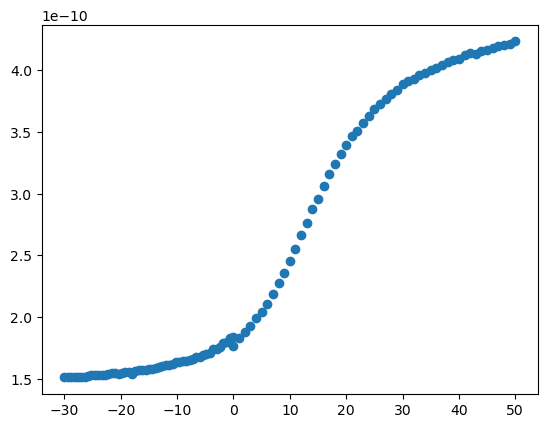

In [11]:
plt.plot(-VGS_tot[0,:],IDS_tot[0,:],'o')
plt.show()

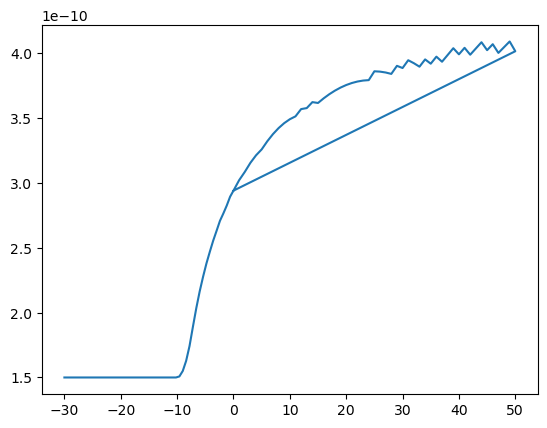

In [45]:
def my_fit(VGS,Rc,Vth,alpha,i0):
    wanted_VDS = 3
    VSc = np.linspace(0,20,1000)
    IDS = np.zeros([len(VGS), len(VSc)])
    VDS = np.zeros([len(VGS), len(VSc)])

    for i in range(len(VGS)):
        temp_IDS =alpha * (VGS[i] - Vth - VSc/2)*VSc
        IDS[i,:] = temp_IDS
        inds = np.where(temp_IDS == max(temp_IDS))[0][0]
        IDS[i,inds:]=max(temp_IDS)
        VDS[i,:] = VSc + 2*Rc*IDS[i,:]

    inds = np.argmin(abs(VDS-wanted_VDS), axis = 1)
    IDS_to_plot = 0*VGS
    VSc_for_VDS = 0*VGS
    for i in range(len(IDS_to_plot)):
        IDS_to_plot[i] = IDS[i,inds[i]]
        VSc_for_VDS[i] = VSc[inds[i]]

    return IDS_to_plot + i0
IDS_fit = my_fit(-VGS_tot[0,:],0.5*1e10,-10,1e-11,1.5e-10)
plt.figure()
plt.plot(-VGS_tot[0,:],IDS_fit)


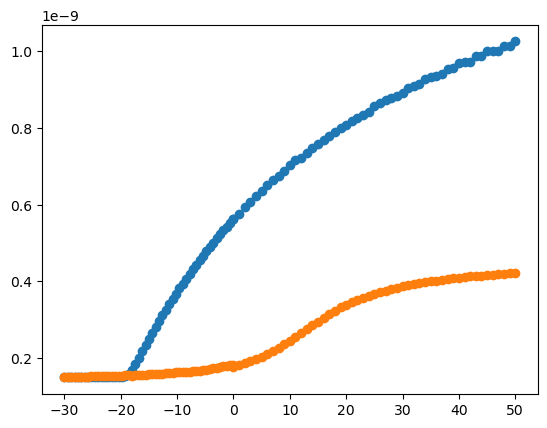

In [46]:

popt, pcov = curve_fit(my_fit,-VGS_tot[0,:],IDS_tot[0,:], p0=[0.5*1e10,-10,1e-11,1.5e-10])

IDS_fit = my_fit(-VGS_tot[0,:],1e9,-20,1e-11,1.5e-10)
plt.figure()
plt.plot(-VGS_tot[0,:],IDS_fit, 'o')
plt.plot(-VGS_tot[0,:],IDS_tot[0,:],'o')